# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except any:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Perceptrons

In [2]:
df = pd.read_csv("./datasets/penguins.csv")
df = df.dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [3]:
sex_int = {'male': 1, 'female': 0}
species_int = {'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2}
species_names = ['Adelie', 'Gentoo', 'Chinstrap']

df['sex'] = df['sex'].map(sex_int)
df['species'] = df['species'].map(species_int)

X = df.drop(['species', 'island'], axis=1)[['bill_length_mm', 'bill_depth_mm']]
y = df['species'].to_numpy()
X = X.rename(columns={'bill_length_mm': 0, 'bill_depth_mm': 1}).to_numpy()
columns_names = ['bill_length_mm', 'bill_depth_mm']

In [4]:
from sklearn.linear_model import Perceptron

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[45, 23]])

In [5]:
y_pred

array([0], dtype=int64)

Saving figure perceptron_penguin_plot


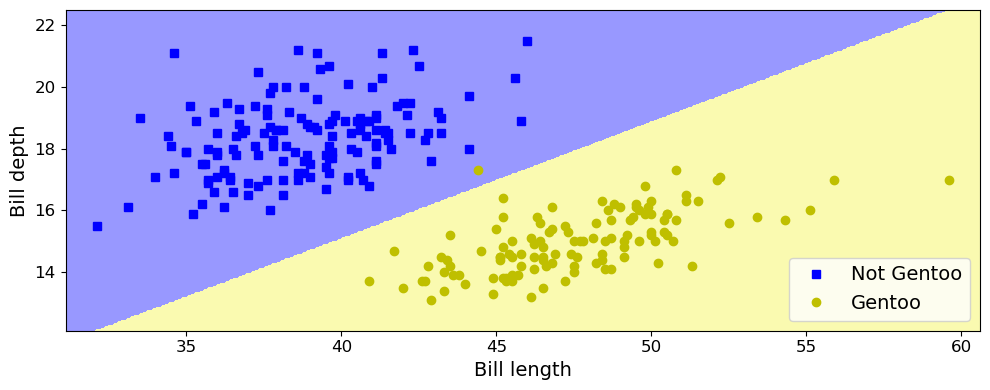

In [6]:
x_min = X[:, 0].min()-1
x_max = X[:, 0].max()+1
y_min = X[:, 1].min()-1
y_max = X[:, 1].max()+1
axes = [x_min, x_max, y_min, y_max]

x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label=f"Not {species_names[1]}")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label=species_names[1])

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Bill length", fontsize=14)
plt.ylabel("Bill depth", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_penguin_plot")
plt.show()

# Activation functions

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


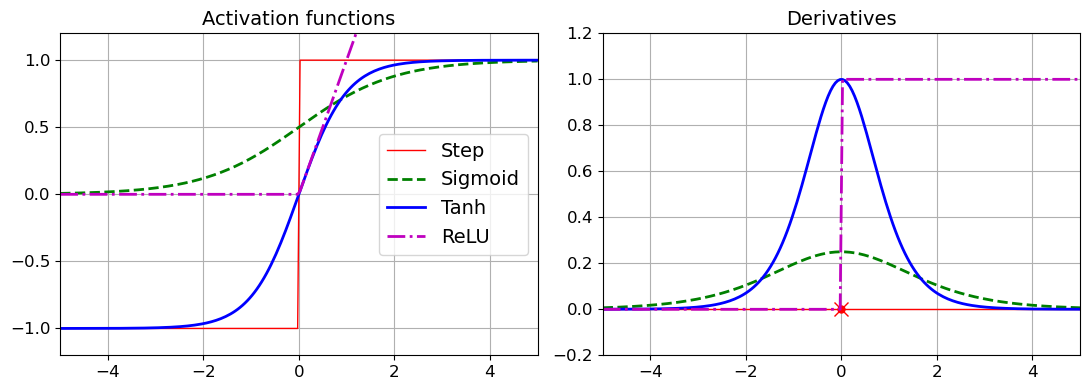

In [8]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [9]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

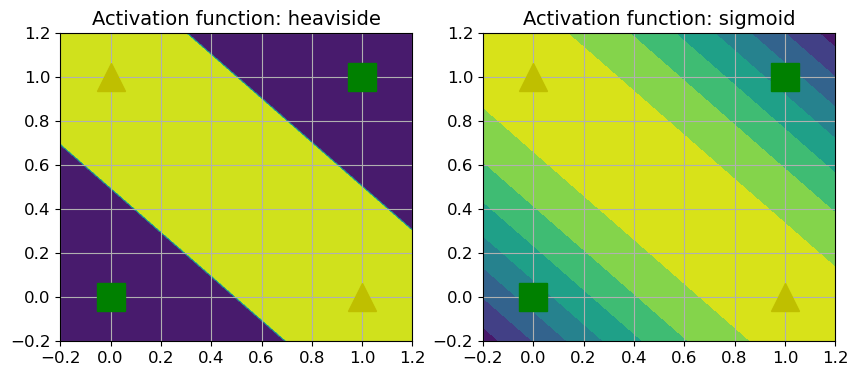

In [10]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Building an Image Classifier

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.12.0'

In [4]:
keras.__version__

'2.12.0'

In [14]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [15]:
X_train_full.shape

(60000, 28, 28)

In [16]:
X_train_full.dtype

dtype('uint8')

In [17]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

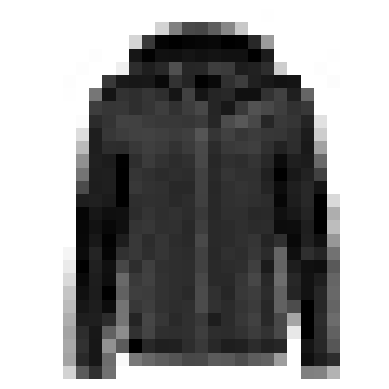

In [18]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [19]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [20]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [21]:
class_names[y_train[0]]

'Coat'

In [22]:
X_valid.shape

(5000, 28, 28)

In [23]:
X_test.shape

(10000, 28, 28)

Saving figure fashion_mnist_plot


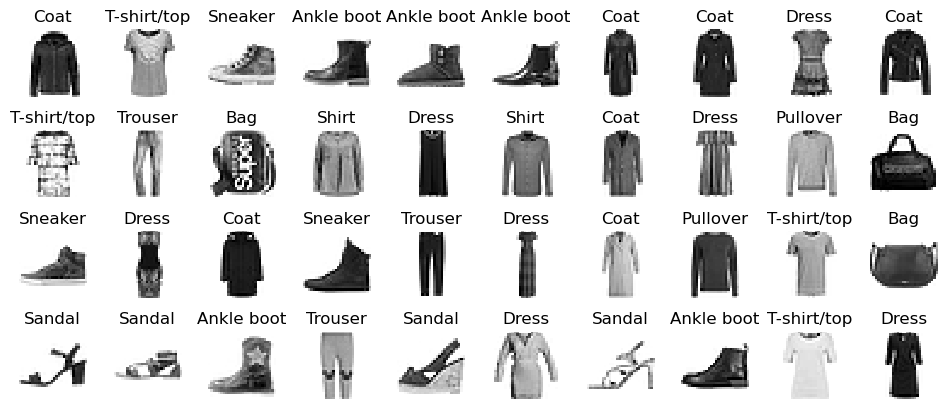

In [24]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [25]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [26]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [27]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [28]:
model.layers

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


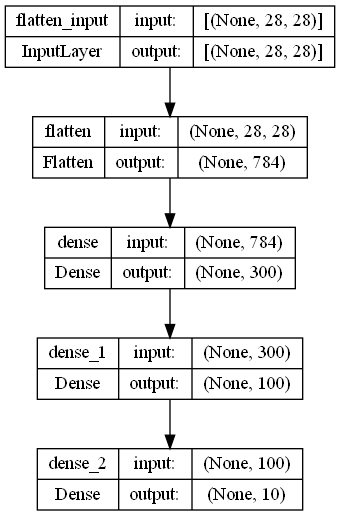

In [30]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [31]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [32]:
model.get_layer(hidden1.name) is hidden1

True

In [33]:
weights, biases = hidden1.get_weights()

In [34]:
weights

array([[ 0.00895733,  0.03637012, -0.02905255, ..., -0.03746776,
        -0.0591787 , -0.06893098],
       [ 0.02924854, -0.05156002,  0.06746797, ...,  0.00459057,
         0.05989288, -0.06094643],
       [-0.02296653,  0.03271361,  0.02841934, ..., -0.04576058,
        -0.06200985,  0.07015266],
       ...,
       [ 0.01578812, -0.02018795,  0.03708118, ..., -0.05592623,
         0.01104541,  0.01886818],
       [ 0.00217567,  0.00875854,  0.06049582, ..., -0.04976834,
         0.03259943, -0.0104333 ],
       [ 0.05486476, -0.03963832, -0.00543678, ...,  0.05933544,
         0.00747859, -0.04161996]], dtype=float32)

In [35]:
weights.shape

(784, 300)

In [36]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [37]:
biases.shape

(300,)

In [38]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [39]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7062 - accuracy: 0.7671 - val_loss: 0.5236 - val_accuracy: 0.8202
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4866 - accuracy: 0.8300 - val_loss: 0.4347 - val_accuracy: 0.8520
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4403 - accuracy: 0.8453 - val_loss: 0.5219 - val_accuracy: 0.8032
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4131 - accuracy: 0.8555 - val_loss: 0.3955 - val_accuracy: 0.8632
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3944 - accuracy: 0.8618 - val_loss: 0.3777 - val_accuracy: 0.8700
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3758 - accuracy: 0.8678 - val_loss: 0.3742 - val_accuracy: 0.8686
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3633 - accuracy: 0.8717 - val_loss: 0.3643 - val_accuracy:

In [40]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [41]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


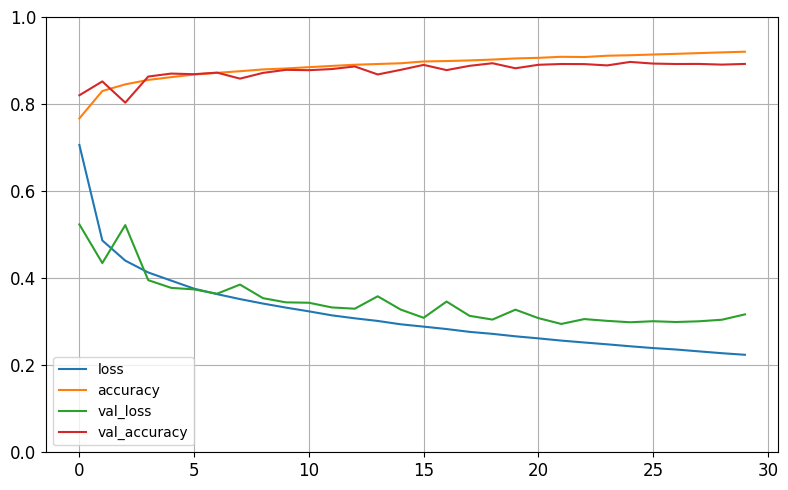

In [43]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

In [44]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3496 - accuracy: 0.8774


[0.34962204098701477, 0.8773999810218811]

In [45]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 90ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [46]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 26ms/step


array([9, 2, 1], dtype=int64)

In [47]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [48]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


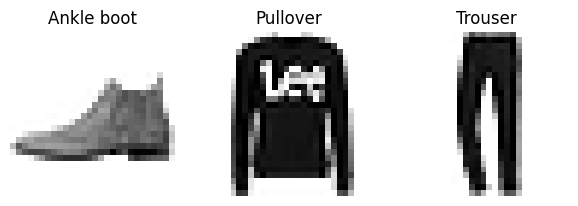

In [49]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

# Regression MLP

In [206]:
df = pd.read_csv("./datasets/kc_house_data.csv")
df = df.drop(["id", "date", "zipcode", "view", "sqft_living15", "sqft_lot15", "sqft_above", "sqft_basement"], axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1955,0,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,1951,1991,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,3,6,1933,0,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1965,0,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1987,0,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,3,8,2009,0,47.6993,-122.346
21609,400000.0,4,2.50,2310,5813,2.0,0,3,8,2014,0,47.5107,-122.362
21610,402101.0,2,0.75,1020,1350,2.0,0,3,7,2009,0,47.5944,-122.299
21611,400000.0,3,2.50,1600,2388,2.0,0,3,8,2004,0,47.5345,-122.069


In [158]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = df.drop("price", axis=1)
target = df["price"]

X_train_full, X_test, y_train_full, y_test = train_test_split(data, target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [159]:
np.random.seed(42)
tf.random.set_seed(42)

In [167]:
l_r = 1e-7

In [168]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=l_r))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
380/380 [==============================] - 1s 2ms/step - loss: 94542798848.0000 - val_loss: 32311238656.0000
Epoch 2/20
380/380 [==============================] - 1s 1ms/step - loss: 38719541248.0000 - val_loss: 32090546176.0000
Epoch 3/20
380/380 [==============================] - 1s 1ms/step - loss: 37247557632.0000 - val_loss: 31836346368.0000
Epoch 4/20
380/380 [==============================] - 1s 1ms/step - loss: 36889833472.0000 - val_loss: 33729507328.0000
Epoch 5/20
380/380 [==============================] - 1s 1ms/step - loss: 35665379328.0000 - val_loss: 30959267840.0000
Epoch 6/20
380/380 [==============================] - 1s 1ms/step - loss: 35384799232.0000 - val_loss: 29186082816.0000
Epoch 7/20
380/380 [==============================] - 0s 1ms/step - loss: 34852364288.0000 - val_loss: 29892388864.0000
Epoch 8/20
380/380 [==============================] - 1s 1ms/step - loss: 34496524288.0000 - val_loss: 28988803072.0000
Epoch 9/20
380/380 [====================

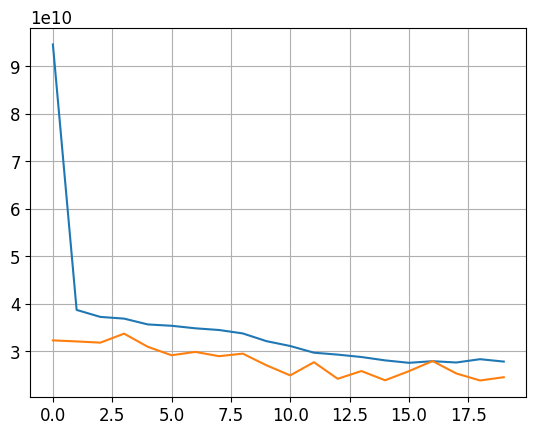

In [169]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.show()

In [170]:
y_pred

array([[ 379199. ],
       [ 782744.6],
       [1195834.1]], dtype=float32)

# Functional API

In [171]:
np.random.seed(42)
tf.random.set_seed(42)

In [186]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [187]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_29 (InputLayer)          [(None, 12)]         0           []                               
                                                                                                  
 dense_97 (Dense)               (None, 30)           390         ['input_29[0][0]']               
                                                                                                  
 dense_98 (Dense)               (None, 30)           930         ['dense_97[0][0]']               
                                                                                                  
 concatenate_6 (Concatenate)    (None, 42)           0           ['input_29[0][0]',               
                                                                  'dense_98[0][0]']         

In [188]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
380/380 [==============================] - 1s 2ms/step - loss: 1143212651577344.0000 - val_loss: 381000679424.0000
Epoch 2/20
380/380 [==============================] - 1s 1ms/step - loss: 228600266752.0000 - val_loss: 126849523712.0000
Epoch 3/20
380/380 [==============================] - 1s 1ms/step - loss: 94138245120.0000 - val_loss: 65590743040.0000
Epoch 4/20
380/380 [==============================] - 1s 1ms/step - loss: 60468154368.0000 - val_loss: 48786378752.0000
Epoch 5/20
380/380 [==============================] - 1s 1ms/step - loss: 50594189312.0000 - val_loss: 43193835520.0000
Epoch 6/20
380/380 [==============================] - 1s 1ms/step - loss: 46956892160.0000 - val_loss: 40866926592.0000
Epoch 7/20
380/380 [==============================] - 1s 1ms/step - loss: 45197529088.0000 - val_loss: 39730327552.0000
Epoch 8/20
380/380 [==============================] - 1s 1ms/step - loss: 44200906752.0000 - val_loss: 39151017984.0000
Epoch 9/20
380/380 [============

In [189]:
np.random.seed(42)
tf.random.set_seed(42)

In [202]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[10], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [203]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-7))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
380/380 [==============================] - 1s 2ms/step - loss: 2731211227136.0000 - val_loss: 416578863104.0000
Epoch 2/20
380/380 [==============================] - 1s 2ms/step - loss: 419277799424.0000 - val_loss: 416516571136.0000
Epoch 3/20
380/380 [==============================] - 1s 2ms/step - loss: 419215081472.0000 - val_loss: 416454475776.0000
Epoch 4/20
380/380 [==============================] - 1s 2ms/step - loss: 419152658432.0000 - val_loss: 416391921664.0000
Epoch 5/20
380/380 [==============================] - 1s 2ms/step - loss: 419090432000.0000 - val_loss: 416329793536.0000
Epoch 6/20
380/380 [==============================] - 1s 2ms/step - loss: 419027779584.0000 - val_loss: 416267403264.0000
Epoch 7/20
380/380 [==============================] - 1s 2ms/step - loss: 418965422080.0000 - val_loss: 416205209600.0000
Epoch 8/20
380/380 [==============================] - 1s 2ms/step - loss: 418902966272.0000 - val_loss: 416143048704.0000
Epoch 9/20
380/380 [===

In [204]:
np.random.seed(42)
tf.random.set_seed(42)

In [207]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[10], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [208]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-7))

In [209]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
380/380 [==============================] - 3s 3ms/step - loss: 1725554229248.0000 - main_output_loss: 1867635097600.0000 - aux_output_loss: 446841159680.0000 - val_loss: 416587251712.0000 - val_main_output_loss: 416582074368.0000 - val_aux_output_loss: 416633028608.0000
Epoch 2/20
380/380 [==============================] - 1s 2ms/step - loss: 419291627520.0000 - main_output_loss: 419284025344.0000 - aux_output_loss: 419360931840.0000 - val_loss: 416536166400.0000 - val_main_output_loss: 416525942784.0000 - val_aux_output_loss: 416628604928.0000
Epoch 3/20
380/380 [==============================] - 1s 2ms/step - loss: 419201810432.0000 - main_output_loss: 419190669312.0000 - aux_output_loss: 419300999168.0000 - val_loss: 416485212160.0000 - val_main_output_loss: 416469843968.0000 - val_aux_output_loss: 416624246784.0000
Epoch 4/20
380/380 [==============================] - 1s 2ms/step - loss: 419189686272.0000 - main_output_loss: 419171532800.0000 - aux_output_loss: 419352281

In [210]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 65ms/step


# The subclassing API

In [211]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [212]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
380/380 [==============================] - 3s 3ms/step - loss: 35814197166080.0000 - output_1_loss: 39697229283328.0000 - output_2_loss: 866705735680.0000 - val_loss: 198197641216.0000 - val_output_1_loss: 178342723584.0000 - val_output_2_loss: 376891506688.0000
Epoch 2/10
380/380 [==============================] - 1s 2ms/step - loss: 152966086656.0000 - output_1_loss: 129750220800.0000 - output_2_loss: 361908109312.0000 - val_loss: 120556707840.0000 - val_output_1_loss: 95992782848.0000 - val_output_2_loss: 341632188416.0000
Epoch 3/10
380/380 [==============================] - 1s 2ms/step - loss: 108850765824.0000 - output_1_loss: 84348076032.0000 - output_2_loss: 329375055872.0000 - val_loss: 97634598912.0000 - val_output_1_loss: 73890676736.0000 - val_output_2_loss: 311329947648.0000
Epoch 4/10
380/380 [==============================] - 1s 2ms/step - loss: 94647468032.0000 - output_1_loss: 71671398400.0000 - output_2_loss: 301431881728.0000 - val_loss: 89306636288.0000 -

# Saving and Restoring

In [213]:
np.random.seed(42)
tf.random.set_seed(42)

In [220]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[12]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [221]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-7))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
380/380 [==============================] - 1s 2ms/step - loss: 6449383719615713523502415872.0000 - val_loss: 2517965111033856.0000
Epoch 2/10
380/380 [==============================] - 1s 2ms/step - loss: 2518017724383232.0000 - val_loss: 2517510112935936.0000
Epoch 3/10
380/380 [==============================] - 1s 2ms/step - loss: 2517562457849856.0000 - val_loss: 2517053772660736.0000
Epoch 4/10
380/380 [==============================] - 1s 2ms/step - loss: 2517106922881024.0000 - val_loss: 2516599311433728.0000
Epoch 5/10
380/380 [==============================] - 1s 2ms/step - loss: 2516649777299456.0000 - val_loss: 2516143239593984.0000
Epoch 6/10
380/380 [==============================] - 1s 2ms/step - loss: 2516195584507904.0000 - val_loss: 2515689046802432.0000
Epoch 7/10
380/380 [==============================] - 1s 2ms/step - loss: 2515741660151808.0000 - val_loss: 2515233511833600.0000
Epoch 8/10
380/380 [==============================] - 1s 2ms/step - loss: 2515

In [222]:
model.save("my_keras_model.h5")

In [223]:
model = keras.models.load_model("my_keras_model.h5")

In [224]:
model.predict(X_new)

1/1 [==============================] - 0s 52ms/step


array([[50676804.],
       [50676804.],
       [50676804.]], dtype=float32)

In [225]:
model.save_weights("my_keras_weights.ckpt")

In [226]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training

In [227]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [228]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[12]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [229]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-7))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
380/380 [==============================] - 2s 2ms/step - loss: 16579119322637516406784.0000 - val_loss: 745538453504.0000
Epoch 2/10
380/380 [==============================] - 1s 2ms/step - loss: 746868441088.0000 - val_loss: 745444737024.0000
Epoch 3/10
380/380 [==============================] - 1s 2ms/step - loss: 746775052288.0000 - val_loss: 745350889472.0000
Epoch 4/10
380/380 [==============================] - 1s 2ms/step - loss: 746681466880.0000 - val_loss: 745256845312.0000
Epoch 5/10
380/380 [==============================] - 1s 2ms/step - loss: 746587815936.0000 - val_loss: 745162539008.0000
Epoch 6/10
380/380 [==============================] - 1s 2ms/step - loss: 746494296064.0000 - val_loss: 745068691456.0000
Epoch 7/10
380/380 [==============================] - 1s 2ms/step - loss: 746400579584.0000 - val_loss: 744974974976.0000
Epoch 8/10
380/380 [==============================] - 1s 2ms/step - loss: 746306863104.0000 - val_loss: 744880996352.0000
Epoch 9/10
38

In [230]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-7))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
380/380 [==============================] - 1s 2ms/step - loss: 746026893312.0000 - val_loss: 744600109056.0000
Epoch 2/100
380/380 [==============================] - 1s 2ms/step - loss: 745933373440.0000 - val_loss: 744506261504.0000
Epoch 3/100
380/380 [==============================] - 1s 2ms/step - loss: 745839984640.0000 - val_loss: 744412479488.0000
Epoch 4/100
380/380 [==============================] - 1s 2ms/step - loss: 745746661376.0000 - val_loss: 744318500864.0000
Epoch 5/100
380/380 [==============================] - 1s 2ms/step - loss: 745653075968.0000 - val_loss: 744224522240.0000
Epoch 6/100
380/380 [==============================] - 1s 2ms/step - loss: 745559556096.0000 - val_loss: 744130805760.0000
Epoch 7/100
380/380 [==============================] - 1s 2ms/step - loss: 745466167296.0000 - val_loss: 744037023744.0000
Epoch 8/100
380/380 [==============================] - 1s 2ms/step - loss: 745372909568.0000 - val_loss: 743943634944.0000
Epoch 9/100
380/

In [231]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [232]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

371/380 [============================>.] - ETA: 0s - loss: 737918648320.0000
val/train: 1.00
380/380 [==============================] - 1s 2ms/step - loss: 736753418240.0000 - val_loss: 735295242240.0000


# TensorBoard

In [233]:
root_logdir = os.path.join(os.curdir, "my_logs")

In [234]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2023_05_03-14_35_54'

In [235]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [236]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[12]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-7))

In [237]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
380/380 [==============================] - 2s 4ms/step - loss: 51209314334944581560848405757952.0000 - val_loss: 272415036082153848832.0000
Epoch 2/30
380/380 [==============================] - 1s 2ms/step - loss: 272395913375923568640.0000 - val_loss: 272376526786902622208.0000
Epoch 3/30
380/380 [==============================] - 1s 2ms/step - loss: 272357175382253764608.0000 - val_loss: 272337982307279306752.0000
Epoch 4/30
380/380 [==============================] - 1s 2ms/step - loss: 272318683679188582400.0000 - val_loss: 272299385051097858048.0000
Epoch 5/30
380/380 [==============================] - 1s 2ms/step - loss: 272280086423007133696.0000 - val_loss: 272260858163660587008.0000
Epoch 6/30
380/380 [==============================] - 1s 2ms/step - loss: 272241788233988440064.0000 - val_loss: 272222296091851227136.0000
Epoch 7/30
380/380 [==============================] - 1s 2ms/step - loss: 272203050240318636032.0000 - val_loss: 272183821980972089344.0000
Epoch 8/3

In [238]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Launching TensorBoard...

In [239]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2023_05_03-14_38_15'

In [240]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [245]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[12]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-7))

In [246]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
380/380 [==============================] - 2s 3ms/step - loss: 29904644619678609571840.0000 - val_loss: 302583611392.0000
Epoch 2/30
380/380 [==============================] - 1s 2ms/step - loss: 305948917760.0000 - val_loss: 302556905472.0000
Epoch 3/30
380/380 [==============================] - 1s 2ms/step - loss: 305922637824.0000 - val_loss: 302530199552.0000
Epoch 4/30
380/380 [==============================] - 1s 2ms/step - loss: 305895997440.0000 - val_loss: 302503460864.0000
Epoch 5/30
380/380 [==============================] - 1s 2ms/step - loss: 305869357056.0000 - val_loss: 302476656640.0000
Epoch 6/30
380/380 [==============================] - 1s 2ms/step - loss: 305842913280.0000 - val_loss: 302450147328.0000
Epoch 7/30
380/380 [==============================] - 1s 2ms/step - loss: 305816371200.0000 - val_loss: 302423441408.0000
Epoch 8/30
380/380 [==============================] - 1s 2ms/step - loss: 305789730816.0000 - val_loss: 302396735488.0000
Epoch 9/30
38

In [247]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=0, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



# Hyperparameter Tuning

In [248]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [249]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-7, input_shape=[12]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [250]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\balanton\AppData\Local\Temp\ipykernel_3516\4087176523.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [251]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
380/380 [==============================] - 1s 2ms/step - loss: 70191644672.0000 - val_loss: 36769013760.0000
Epoch 2/100
380/380 [==============================] - 1s 1ms/step - loss: 62460342272.0000 - val_loss: 65191235584.0000
Epoch 3/100
380/380 [==============================] - 1s 1ms/step - loss: 69306032128.0000 - val_loss: 70158761984.0000
Epoch 4/100
380/380 [==============================] - 1s 1ms/step - loss: 61737836544.0000 - val_loss: 270085210112.0000
Epoch 5/100
380/380 [==============================] - 1s 1ms/step - loss: 52075958272.0000 - val_loss: 38831403008.0000
Epoch 6/100
380/380 [==============================] - 1s 1ms/step - loss: 52707377152.0000 - val_loss: 57112236032.0000
Epoch 7/100
380/380 [==============================] - 1s 1ms/step - loss: 63638073344.0000 - val_loss: 62470467584.0000
Epoch 8/100
380/380 [==============================] - 1s 1ms/step - loss: 60018495488.0000 - val_loss: 40410112000.0000
Epoch 9/100
380/380 [==========

In [252]:
mse_test = keras_reg.score(X_test, y_test)

169/169 [==============================] - 0s 1ms/step - loss: 91013300224.0000


In [253]:
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 52ms/step


In [254]:
np.random.seed(42)
tf.random.set_seed(42)

In [262]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(1e-9, 1e-8)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
254/254 [==============================] - 1s 2ms/step - loss: 414847401984.0000 - val_loss: 416631717888.0000
Epoch 2/100
254/254 [==============================] - 0s 2ms/step - loss: 414836686848.0000 - val_loss: 416612384768.0000
Epoch 3/100
254/254 [==============================] - 0s 2ms/step - loss: 414791663616.0000 - val_loss: 416523157504.0000
Epoch 4/100
254/254 [==============================] - 0s 2ms/step - loss: 414574116864.0000 - val_loss: 416082984960.0000
Epoch 5/100
254/254 [==============================] - 0s 2ms/step - loss: 413492576256.0000 - val_loss: 413907451904.0000
Epoch 6/100
254/254 [==============================] - 0s 2ms/step - loss: 408212209664.0000 - val_loss: 403439583232.0000
Epoch 7/100
254/254 [==============================] - 0s 2ms/step - loss: 384390299648.0000 - val_loss: 358964789248.0000
Epoch 8/100
254/254 [==============================] - 0s 2ms/step - loss: 305

C:\Users\balanton\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [-3.53973460e+10 -3.18156670e+10 -4.19244289e+11 -4.19301840e+11
 -3.29190065e+10             nan             nan             nan
 -3.27040628e+10 -2.88530903e+11]
  warnings.warn(


380/380 [==============================] - 1s 2ms/step - loss: 418212872192.0000 - val_loss: 286837702656.0000
Epoch 2/100
380/380 [==============================] - 1s 2ms/step - loss: 65249349632.0000 - val_loss: 64547373056.0000
Epoch 3/100
380/380 [==============================] - 1s 2ms/step - loss: 84632018944.0000 - val_loss: 53162401792.0000
Epoch 4/100
380/380 [==============================] - 1s 2ms/step - loss: 48452947968.0000 - val_loss: 172152963072.0000
Epoch 5/100
380/380 [==============================] - 1s 2ms/step - loss: 45367988224.0000 - val_loss: 33029576704.0000
Epoch 6/100
380/380 [==============================] - 1s 2ms/step - loss: 43025833984.0000 - val_loss: 30990639104.0000
Epoch 7/100
380/380 [==============================] - 1s 2ms/step - loss: 46843379712.0000 - val_loss: 35248689152.0000
Epoch 8/100
380/380 [==============================] - 1s 2ms/step - loss: 42075447296.0000 - val_loss: 32173295616.0000
Epoch 9/100
380/380 [====================

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001C53BDCB8E0>,
                   param_distributions={'learning_rate': [5.447614170260323e-09,
                                                          1.926473978157348e-09,
                                                          8.13718810477477e-09,
                                                          1.8167810392414045e-09,
                                                          3.440259196968034e-09,
                                                          1.9994645623655803e-09,
                                                          4.051204940994228e-09,
                                                          1.0902153284549845e-09,
                                                          1.5064646612032612e-09,
                                                          5.3631...
                                                          1.14185289544

In [263]:
rnd_search_cv.best_params_

{'n_neurons': 52, 'n_hidden': 2, 'learning_rate': 2.3499337700731124e-09}

In [264]:
rnd_search_cv.best_score_

-31815667029.333332

In [265]:
rnd_search_cv.best_estimator_

In [266]:
rnd_search_cv.score(X_test, y_test)

169/169 [==============================] - 0s 1ms/step - loss: 32244908032.0000


-32244908032.0

In [267]:
model = rnd_search_cv.best_estimator_.model
model

In [268]:
model.evaluate(X_test, y_test)

169/169 [==============================] - 0s 2ms/step - loss: 32244908032.0000


32244908032.0